# Problem Statement

In [1]:
# import warnings

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#import necessary libraries

import pandas as pd, numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# for statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# display maximum number of rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data Understanding

In [4]:
# load data
lead_score = pd.read_csv("leads.csv")

In [5]:
# Check the head of the dataset
lead_score.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [6]:
lead_score.shape

(9240, 37)

In [7]:
# concise summary of the DataFrame's structure
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# getting the descriptive statistics of all the numerical columns
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# check if any duplicates in our DataFrame
lead_score.duplicated().sum()

0

# Data Pre-processing

### Data Cleaning

In [10]:
lead_score.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
# Prospect ID is a unique identifier already in object dtype
#'Lead Number' is a unique identifier that doesn't have any mathematical significance so convert the 'Lead Number' column to object type.
lead_score['Lead Number'] = lead_score['Lead Number'].astype('object')

-  There are few categorical values that have 'select' as a level which indicates that a user might not have choosen any option from the dropdown menu and thus we can replace this with NaN.

In [12]:
# Handling the 'select' level present in few of the categorical variables
lead_score = lead_score.replace('Select' , np.nan)

In [13]:
# Checking for missing values
missing_value_percentage = round(lead_score.isnull().mean() * 100 ,2)

missing_value_percentage

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
# Filter the columns to drop those with missing values above 40%
columns_to_drop = missing_value_percentage[missing_value_percentage > 40].index

# view the columns to drop
columns_to_drop

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [15]:
# dropping the columns having missing values > 40%
lead_score.drop(columns = columns_to_drop , inplace=True)

In [16]:
# check missing percentage again
round(lead_score.isnull().mean() *100 ,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

-  There are still few columns with higher missing values, such as 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City'; let us analysis them and understand the distribution of different values in these columns.

In [17]:
# Check the value counts for the 'Country' column
lead_score['Country'].value_counts(normalize = True) *100

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switze

-  As we can see that majority of leads are from India, with 6492 entries and the counts for other countries are significantly lower, so we fill the missing values with 'India' and combine rest of the countries into a single category named "Others".

In [18]:
# Fill missing values in the 'Country' column with 'India'
lead_score['Country'].fillna('India', inplace=True)

In [19]:
# replace all countries except India with 'Others'
lead_score['Country'] = lead_score['Country'].apply(lambda x: 'India' if x == 'India' else 'Others')

In [20]:
# lets again check distribution
round(lead_score['Country'].value_counts(normalize = True) *100, 2)

Country
India     96.89
Others     3.11
Name: proportion, dtype: float64

-  Majority of leads or potential leads i.e. approximately 96.89%, are from India. The remaining countries contribute to only about 3.11%. This highly imbalanced distribution may not provide significant predictive value for our model thus we drop it.

In [21]:
# Drop the 'Country' column
lead_score.drop(columns=['Country'], inplace=True)

In [22]:
# Also drop 'City' column since location is irrelevant for our problem statement and is unlikely to provide any significant predictive value for our model
lead_score.drop(columns=['City'], inplace=True)

In [23]:
# Replace missing values in the 'Specialization' column with 'Not Provided'
lead_score['Specialization'].fillna('Not Provided', inplace=True)

In [24]:
lead_score['Specialization'].value_counts(normalize = True) *100

Specialization
Not Provided                         36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

-  Due to the large number of specialization fields and the presence of low data counts in many categories, it's beneficial to combine similar domains to improve data representation also this reduces the number of unique labels that will help during the creation of dummy variables.

In [25]:
# combining similar specialization
var_1 = ['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 'Business Administration', 'International Business', 'Hospitality Management', 'Retail Management', 'Services Excellence', 'Supply Chain Management']
var_2 = ['IT Projects Management', 'E-COMMERCE', 'E-Business']
var_3 = ['Banking, Investment And Insurance', 'Healthcare Management', 'Travel and Tourism', 'Media and Advertising', 'Rural and Agribusiness']

lead_score['Specialization'] = lead_score['Specialization'].replace(var_1, 'Management')
lead_score['Specialization'] = lead_score['Specialization'].replace(var_2, 'Technology and Projects')
lead_score['Specialization'] = lead_score['Specialization'].replace(var_3, 'Sector-Specific')

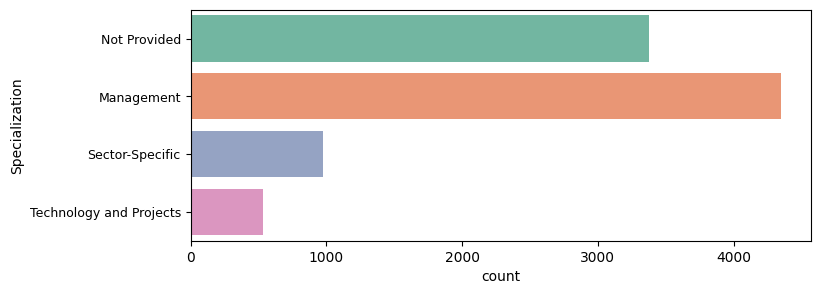

In [26]:
#lets visualize how skewed the data is
plt.figure(figsize= [8,3])
sns.countplot(lead_score['Specialization'], palette ="Set2")
plt.yticks(fontsize = 9)
plt.show()

-  A significant portion of the data indicates missing information, since 'Specialization' is a categorical column we can impute missing data with the most frequent i.e. the mode, in this case 'Management', however, imputing with the mode may result in that category becoming overly dominant, which can skew the data and affect the performance of the model. 

In [27]:
# Replace missing values in the 'What is your current occupation' column with 'Not Provided'
lead_score['What is your current occupation'].fillna('Not Provided', inplace=True)

In [28]:
# Check the value counts for the 'What is your current occupation' column
lead_score['What is your current occupation'].value_counts(normalize = True) *100

What is your current occupation
Unemployed              60.606061
Not Provided            29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [29]:
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Businessman'], 'Working Professional')
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Housewife','Other'], 'Others')
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Not Provided'], 'Unemployed')

In [30]:
lead_score['What is your current occupation'].value_counts(normalize = True) *100

What is your current occupation
Unemployed              89.718615
Working Professional     7.727273
Student                  2.272727
Others                   0.281385
Name: proportion, dtype: float64

In [31]:
# Replace missing values in the 'What matters most to you in choosing a course' column with 'Not Provided'
lead_score['What matters most to you in choosing a course'].fillna('Not Provided', inplace=True)

In [32]:
# Check the value counts for the 'What matters most to you in choosing a course' column
lead_score['What matters most to you in choosing a course'].value_counts(normalize = True) *100

What matters most to you in choosing a course
Better Career Prospects      70.649351
Not Provided                 29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

-  the 'What matters most to you in choosing a course' column is highly imbalanced, with the vast majority of entries falling under 'Better Career Prospects.' In cases like this, the imbalance can result in the feature providing little to no meaningful contribution to a predictive model.

In [33]:
# Drop the 'What matters most to you in choosing a course' column
lead_score.drop(columns=['What matters most to you in choosing a course'], inplace=True)

In [34]:
# Replace missing values in the 'Tags' column with 'Not Provided'
lead_score['Tags'].fillna('Not Provided', inplace=True)

In [35]:
# Check the value counts for the 'Tags' column
lead_score['Tags'].value_counts(normalize = True) *100

Tags
Not Provided                                         36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                        

-  The 'Tags' column represents various statuses of leads, with a significant portion labeled as "Not Provided" (36.29%).
-  The 'Tags' column has many unique categories, some of which are redundant or overlap with others. For example, categories like 'Ringing', 'Busy', and 'switched off' all represent different stages of attempted contact, the tags may not provide useful predictive information and do not appear to add significant value for predictive modeling thus we drop it.

In [36]:
# Drop the 'Tags' column
lead_score.drop(columns=['Tags'], inplace=True)

In [37]:
round(lead_score.isnull().mean() * 100 ,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

-  The columns 'Lead Source', 'TotalVisits', 'Page Views Per Visit', and 'Last Activity' have small proportions of missing values which are less than 4-5% so to simplify the data preparation process and ensure the integrity of our dataset, we can safely drop the rows.

In [38]:
# drop rows with missing values less than 4-5%
lead_score = lead_score.dropna()

-  There are some columns in this dataset that have only one single value. 

In [39]:
# Check the unique value counts for the specified columns
print(lead_score['I agree to pay the amount through cheque'].value_counts())
print(lead_score['Update me on Supply Chain Content'].value_counts())
print(lead_score['Get updates on DM Content'].value_counts())
print(lead_score['Receive More Updates About Our Courses'].value_counts())

I agree to pay the amount through cheque
No    9074
Name: count, dtype: int64
Update me on Supply Chain Content
No    9074
Name: count, dtype: int64
Get updates on DM Content
No    9074
Name: count, dtype: int64
Receive More Updates About Our Courses
No    9074
Name: count, dtype: int64


-  Columns with only one unique value like 'No', might not contribute meaningful information that could help in predicting the target variable.

In [40]:
# drop columns with a single unique value
col_to_drop = ['I agree to pay the amount through cheque','Update me on Supply Chain Content','Get updates on DM Content','Receive More Updates About Our Courses']
lead_score.drop(columns=col_to_drop, inplace=True)

In [41]:
lead_score.shape

(9074, 22)

In [42]:
lead_score.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Magazine                                  0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [43]:
lead_score.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Management,Student,No,No,No,No,No,No,No,Yes,Email Opened


### Handling Outliers

In [44]:
lead_score.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


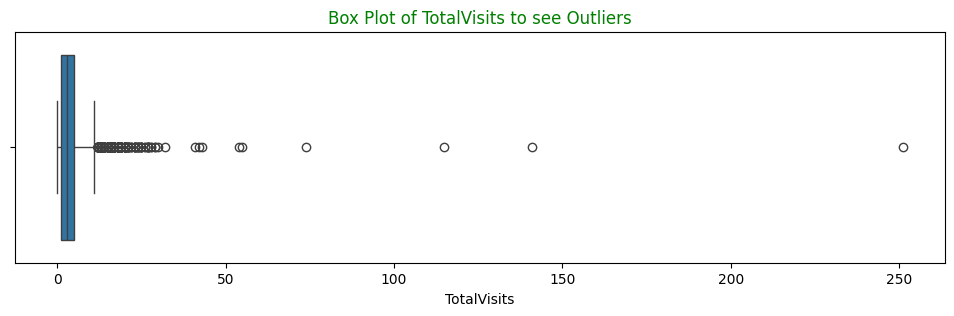

In [45]:
# checking outliers for TotalVisits 
plt.figure(figsize=[12,3])
sns.boxplot(x = lead_score.TotalVisits)
plt.title('Box Plot of TotalVisits to see Outliers', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

-  In the TotalVisits column, which indicates the total number of visits made by the customer to the website, the maximum value is 251 which seems abnormally high and likely represents erroneous data.

In [46]:
lead_score['TotalVisits'].quantile(0.99)

17.0

In [47]:
# check the dataset for values of TotalVisits above 20
lead_score[lead_score['TotalVisits'] > 20]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
345,b852d04d-932a-4afd-8ab6-5be1b22ca1cf,656743,Landing Page Submission,Organic Search,No,No,1,21.0,1113,2.63,Email Opened,Management,Unemployed,No,No,No,No,No,No,No,Yes,Email Opened
469,5e2436a2-a011-4ac6-8165-b7300cc81fd4,655360,Landing Page Submission,Organic Search,No,No,0,22.0,59,5.50,Page Visited on Website,Management,Unemployed,No,No,No,No,No,No,No,Yes,Page Visited on Website
663,f45f8039-d948-4004-9e1b-c56efbab9747,653687,Landing Page Submission,Google,No,No,1,21.0,1885,3.50,Email Opened,Management,Unemployed,No,No,No,No,No,No,No,Yes,Email Opened
1160,424e4ffd-efc9-4dc8-8cd2-5cf3b3e56223,647818,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,Email Opened,Management,Unemployed,No,No,No,No,No,No,No,No,Email Opened
1741,15400e7f-1771-4440-864e-7b229132c3b2,642439,Landing Page Submission,Direct Traffic,Yes,No,0,22.0,601,1.38,Page Visited on Website,Management,Unemployed,No,No,No,No,No,No,No,Yes,Page Visited on Website
1824,8fe92f1a-1d93-472e-9ab3-91d0d9ac4f62,641781,Landing Page Submission,Direct Traffic,No,No,0,30.0,68,10.00,SMS Sent,Management,Unemployed,No,No,No,No,No,No,No,Yes,Modified
2154,b6fa82dc-e10b-4f8a-ba5c-575c17d97024,639121,API,Olark Chat,No,No,1,23.0,1677,2.09,Olark Chat Conversation,Management,Unemployed,No,No,No,No,No,No,No,No,Olark Chat Conversation
2190,0e4c0711-6cb5-455d-8e0d-7f9f2cc4f895,638668,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,Page Visited on Website,Technology and Projects,Unemployed,No,No,No,No,No,No,No,Yes,Modified
2289,082ee6a1-e140-4d68-b88e-2a062e075e50,637608,Landing Page Submission,Google,No,No,1,21.0,1198,5.25,View in browser link Clicked,Management,Unemployed,No,No,No,No,No,No,No,Yes,Modified
2322,272696ed-4aff-4b42-8829-b63f122493d9,637257,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71,Page Visited on Website,Management,Unemployed,No,No,No,No,No,No,No,Yes,Page Visited on Website


-  From the above analysis it seems that few of the leads who visited the website more than 20 times have been converted but the rest seem outliers and they can skew the distribution, leading to biased estimates, and potentially mislead the model, so we drop them.

In [48]:
# Filter the DataFrame to include only rows where TotalVisits is less than 30
lead_score = lead_score[lead_score['TotalVisits'] < 30]

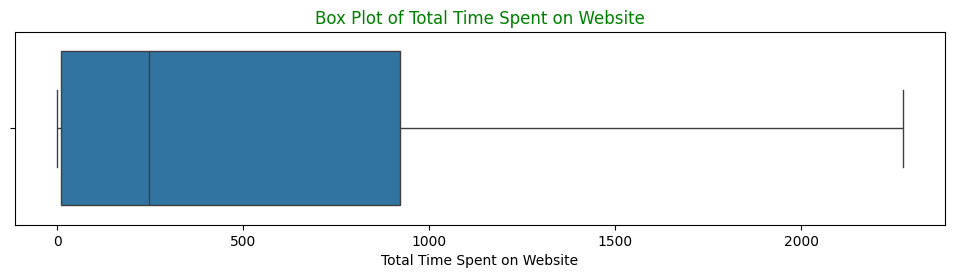

In [49]:
# checking outliers for Total Time Spent on Website 
plt.figure(figsize=[12,2.5])
sns.boxplot(x = lead_score['Total Time Spent on Website'])
plt.title('Box Plot of Total Time Spent on Website', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

- Since there are no outliers for 'Total Time Spent on Website', we dont need outlier treatment.

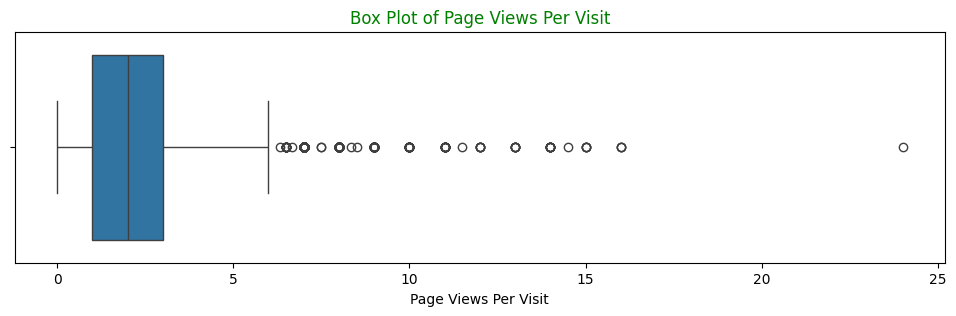

In [50]:
# checking outliers for Page Views Per Visit 
plt.figure(figsize=[12,3])
sns.boxplot(x = lead_score['Page Views Per Visit'])
plt.title('Box Plot of Page Views Per Visit', fontdict={'fontsize': 12, 'color' : 'Green'})
plt.show()

In [51]:
lead_score['Page Views Per Visit'].quantile(0.99)

9.0

In [52]:
# check the dataset for values of Page Views Per Visit above 15
lead_score[lead_score['Page Views Per Visit'] > 15]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
125,46921843-bfc8-443d-96f8-18495891aef6,659241,API,Referral Sites,No,No,0,16.0,53,16.0,Olark Chat Conversation,Not Provided,Unemployed,No,No,No,No,No,No,No,No,Modified
5164,7b9369a0-b997-41f0-8a04-68677de0f1c8,610357,Landing Page Submission,Direct Traffic,Yes,No,0,16.0,103,16.0,Page Visited on Website,Management,Unemployed,No,No,No,No,No,No,No,Yes,Modified
5495,48a5b72c-db78-48ab-bb15-8210754102ab,607748,Landing Page Submission,Google,Yes,No,0,16.0,462,16.0,Page Visited on Website,Technology and Projects,Unemployed,No,No,No,No,No,No,No,Yes,Modified
6805,57c557f0-f373-4468-affb-3ed5a03ea47c,597579,API,Organic Search,No,No,1,24.0,1527,24.0,Page Visited on Website,Not Provided,Unemployed,No,No,No,No,No,No,No,No,Modified


-  Above the 99th percentile there are many leads that have been converted, so removing those datapoints, might lead to unnecessary data loss, so we remove only the max datapoint to avoid inaccuracies.

In [53]:
# Filter the DataFrame to include only rows where Page Views Per Visit is less than or equal 16
lead_score = lead_score[lead_score['Page Views Per Visit'] <= 16]

In [54]:
# check size
lead_score.shape

(9062, 22)

In [55]:
# to get the number of unique values for each column
unique_values = pd.DataFrame({'Column Name': lead_score.columns, 'Unique Values': [lead_score[col].nunique() for col in lead_score.columns]})
unique_values = unique_values.sort_values(by='Unique Values')
print(unique_values)

                               Column Name  Unique Values
14                                Magazine              1
19                 Through Recommendations              2
18                   Digital Advertisement              2
4                             Do Not Email              2
5                              Do Not Call              2
6                                Converted              2
17                               Newspaper              2
16                      X Education Forums              2
15                       Newspaper Article              2
20  A free copy of Mastering The Interview              2
13                                  Search              2
2                              Lead Origin              4
11                          Specialization              4
12         What is your current occupation              4
21                   Last Notable Activity             16
10                           Last Activity             17
3             

In [56]:
# Check the unique value counts for the columns with less that 4 unique values except target variable 'Converted'
print(lead_score['Magazine'].value_counts())
print(lead_score['Through Recommendations'].value_counts())
print(lead_score['Do Not Email'].value_counts())
print(lead_score['Do Not Call'].value_counts())
print(lead_score['Digital Advertisement'].value_counts())
print(lead_score['X Education Forums'].value_counts())
print(lead_score['Newspaper Article'].value_counts())
print(lead_score['A free copy of Mastering The Interview'].value_counts())
print(lead_score['Search'].value_counts())

Magazine
No    9062
Name: count, dtype: int64
Through Recommendations
No     9055
Yes       7
Name: count, dtype: int64
Do Not Email
No     8352
Yes     710
Name: count, dtype: int64
Do Not Call
No     9060
Yes       2
Name: count, dtype: int64
Digital Advertisement
No     9058
Yes       4
Name: count, dtype: int64
X Education Forums
No     9061
Yes       1
Name: count, dtype: int64
Newspaper Article
No     9060
Yes       2
Name: count, dtype: int64
A free copy of Mastering The Interview
No     6178
Yes    2884
Name: count, dtype: int64
Search
No     9048
Yes      14
Name: count, dtype: int64


-  Column 'Magazine' has only one unique value and this does not contribute to the model's ability to make predictions, so we drop it and for the rest do EDA and decide.

In [57]:
# drop column 'Magazine'
lead_score.drop(columns = ['Magazine'], inplace =True)

In [58]:
lead_score.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,No,No,No,No,No,No,No,Email Opened


In [59]:
# analyse the remaining categorical columns
print(lead_score['Lead Origin'].value_counts())
print(lead_score['Lead Source'].value_counts())
print(lead_score['Last Activity'].value_counts())
print(lead_score['Last Notable Activity'].value_counts())

Lead Origin
Landing Page Submission    4875
API                        3576
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
Lead Source
Google               2867
Direct Traffic       2535
Olark Chat           1753
Organic Search       1153
Reference             443
Welingak Website      129
Referral Sites        123
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
Last Activity
Email Opened                    3430
SMS Sent                        2714
Olark Chat Conversation          972
Page Visited on Website          632
Converted to Lead                428
Email Bounced                    312
Email Link Cli

-  'Lead Source' column indicates where the lead originated from, knowing the source of a lead can provide crucial insights into which channels are most effective at generating hot leads.
-  'Last Activity' column records the last interaction a lead had, understanding the last activity will help in planning the next step and can help predict the likelihood of conversion based on recent behavior.
-  'Last Notable Activity' column captures the last significant interaction, which might not always be the most recent activity, but since this column might be useful for training the mode, we will decide after checking for mmulticollinearity, whether to drop it.

In [60]:
# standardize similar labels
lead_score['Lead Source'] = lead_score['Lead Source'].replace({'google': 'Google'})

In [61]:
# replace the labels having less data entry points with 'others'
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['bing', 'Click2call', 'Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'], 'Other Sources')

In [62]:
# replace the labels having less data entry points with 'others'
lead_score['Last Activity'] = lead_score['Last Activity'].replace(['View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'], 'Other Activities')

In [63]:
# replace the labels having less data entry points with 'others'
lead_score['Last Notable Activity'] = lead_score['Last Notable Activity'].replace(['Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'], 'Others')

In [64]:
lead_score.shape

(9062, 21)

# EDA

In [65]:
# check imbalance percentage
lead_score.Converted.value_counts(normalize  = True)  *100

Converted
0    62.116531
1    37.883469
Name: proportion, dtype: float64

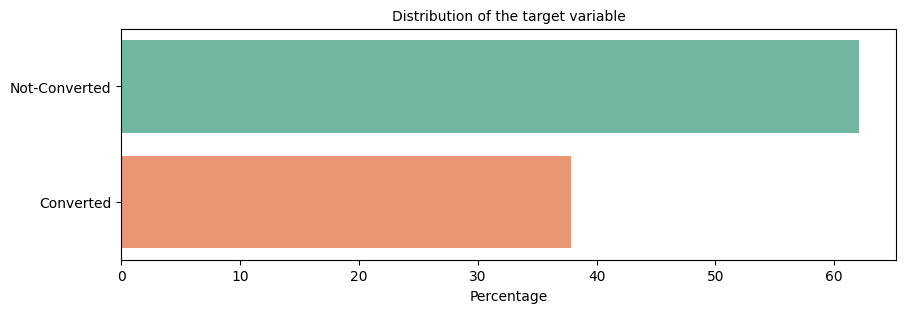

In [66]:
# Visualizing univariate characteristics of the Target variable
plt.figure(figsize= [10,3])
sns.barplot(y = ['Not-Converted','Converted'] ,  x = lead_score["Converted"].value_counts(normalize =True)*100, palette ="Set2")
plt.xlabel('Percentage')
plt.title("Distribution of the target variable", fontdict = {"fontsize":10})
plt.show()

### Univariate Analysis

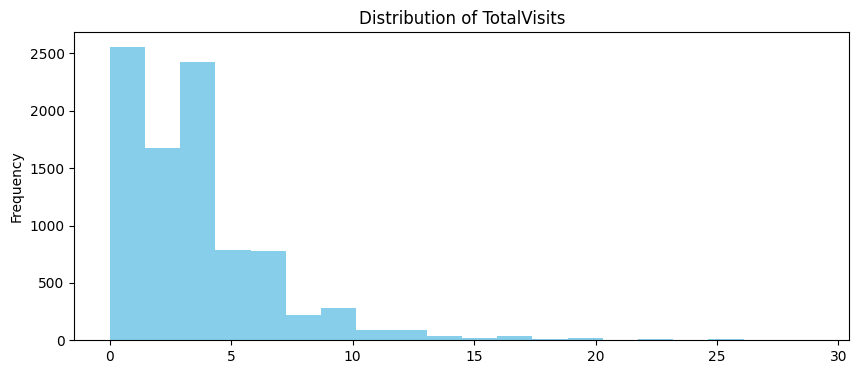

In [67]:
# to check distribution of TotalVisits
plt.figure(figsize = (10,4))
lead_score['TotalVisits'].plot(kind='hist',bins=20 , color = "skyblue")
plt.title('Distribution of TotalVisits')
plt.ylabel('Frequency')
plt.show()

-  The histogram shows a right-skewed distribution, max frequency distribution is accumulated for number of total visits between 0 to 5, the frequency of total visits decreases as the number of visits increases.

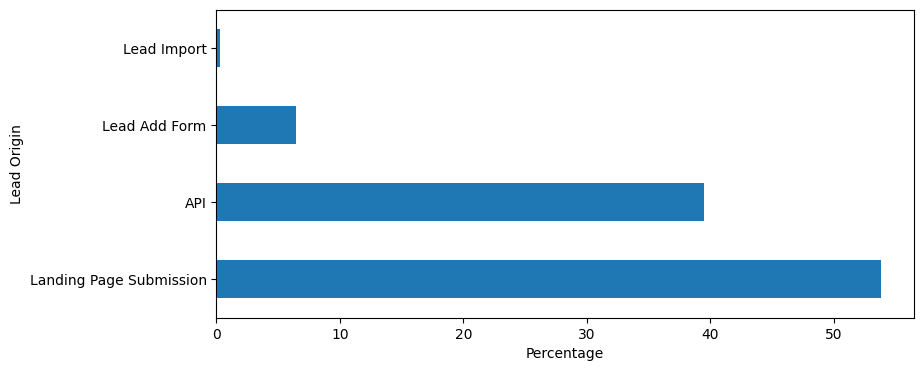

In [68]:
# percentage distribution of Lead Origin
plt.figure(figsize = (9,4))
(lead_score['Lead Origin'].value_counts(normalize = True)*100).plot.barh() 
plt.xlabel('Percentage')
plt.show()

-  The 'Lead Origin' variable seems to categorize the source or method through which customers have been identified to be a potential lead.
-  'Landing Page Submission' category has the highest percentage, indicating that most of the leads are identified through landing page submissions, almost more than 55 % of our dataset.
-  'API' category also has identified significant number of leads, 'Lead Import' has the lowest percentage to help identify leads.

### Segmented Univariate

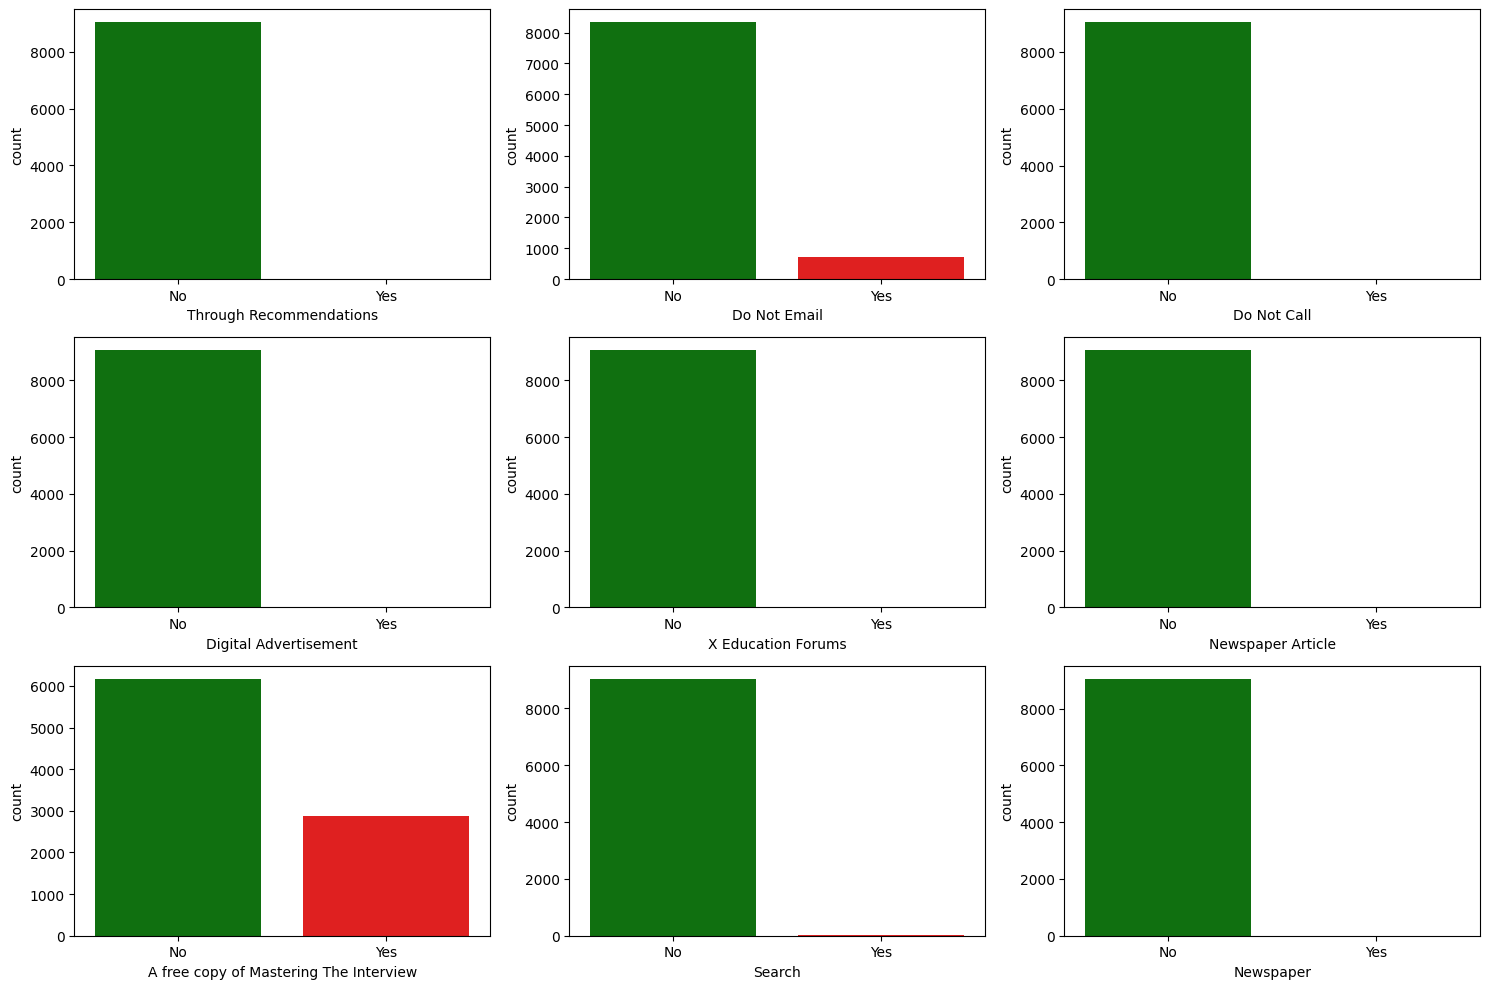

In [69]:
# Analyzing leads preferences and their response to advertisements
lead_preferences = ['Through Recommendations','Do Not Email','Do Not Call','Digital Advertisement','X Education Forums','Newspaper Article','A free copy of Mastering The Interview','Search','Newspaper']
fig, axes = plt.subplots(nrows = 3 , ncols = 3, figsize=(15, 10))
axes = axes.flatten()     # Flatten the axes array for easy iteration

# Iterate over columns to plot counts
for i, col in enumerate(lead_preferences):
    sns.countplot(x=col,data=lead_score, ax=axes[i] ,palette=["g", "r"] )
    
plt.tight_layout()    #prevent overlapping to make everything fit nicely
plt.show()

-  It appears that the majority of customers did not acknowledge seeing the advertisement across all the channels listed in the columns. This is indicated by the dominance of the green bars No over the red bars Yes in each plot.
-  The significant imbalance between Yes and No responses in these columns could potentially affect the performance of a predictive model.
-  To simplify our model we drop these columns except variable 'A free copy of Mastering The Interview' and 'Do Not Email'

In [70]:
# drop columns 'Through Recommendations','Do Not Call','Digital Advertisement','X Education Forums','Newspaper Article','Newspaper' and 'Search' 
lead_score.drop(columns = ['Through Recommendations','Do Not Call','Digital Advertisement','X Education Forums','Newspaper Article','Search','Newspaper'], inplace =True)

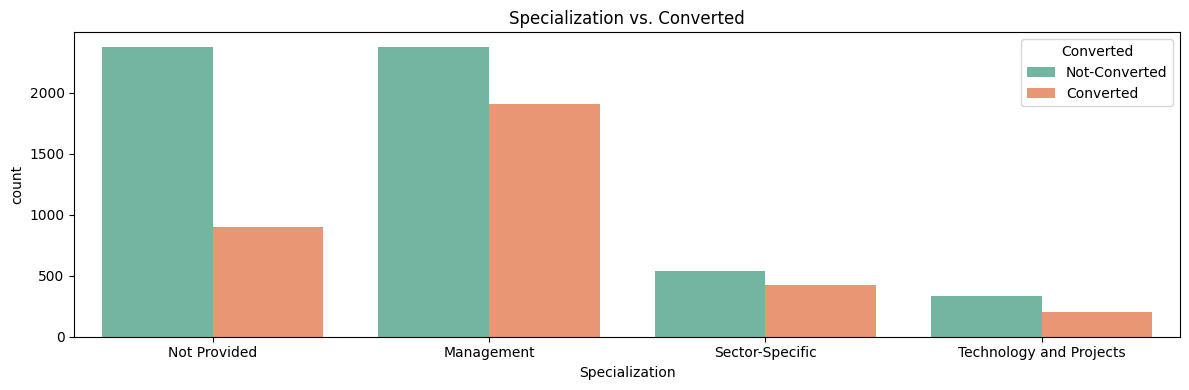

In [71]:
# Analyze how specialization categories influence conversion rates
plt.figure(figsize = [12,4])
sns.countplot(x='Specialization', hue='Converted', data=lead_score,  palette='Set2')
plt.title('Specialization vs. Converted')
plt.legend(title='Converted', labels=['Not-Converted', 'Converted'])
plt.tight_layout() 
plt.show()

-   The majority of lead count fall under the 'Not Provided' specialization category, the conversion rate for this category is higher for the non-converted ones, still has a reasonable conversion rate.
-  'Operations and Others' category shows a higher converted leads, compared to rest of the specialization, it might also be due to combined specialiaztion across different fields for that category.
-  Rest specializations in 'Marketing and Sales', 'Business Administration and IT' and the 'Finance and Banking' category have a relatively balanced distribution between converted and non-converted leads.

### Bivariate Analysis

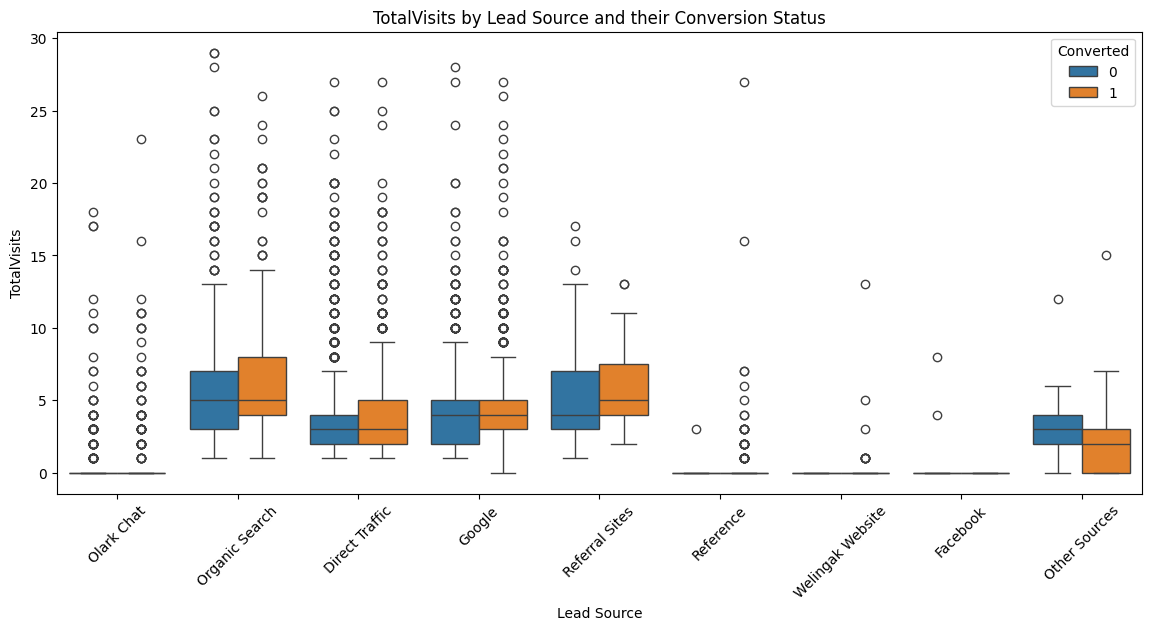

In [72]:
# relationship between the TotalVisits and the Lead Source
plt.figure(figsize=(14, 6))
sns.boxplot(x='Lead Source', y='TotalVisits', hue='Converted', data=lead_score)
plt.title('TotalVisits by Lead Source and their Conversion Status')
plt.xticks(rotation=45)
plt.show()

-  For 'Olark Chat', both converted and non-converted leads have a similar distribution of total visits.
-  Category 'Organic Search' converted leads have a almost similar median number of total visits compared to non-converted leads. 
-  For 'Direct Traffic' source and 'Google' source the medians seem to be almost same for number of visits. although 'Direct Traffic' source seem to have a higher max visits for converted leads.
-  For 'Referral Sites', Converted leads have a slightly higher median number of visits compared to non-converted leads.
-  For 'Reference' there are more visits form the Converted leads compared to the non-converted ones; and for 'Welingak Website' and 'Facebook' both converted and non-converted leads have very few visits, lastly 'Other Sources' have quite some visits with the median of non-converted leads being higher than converted.

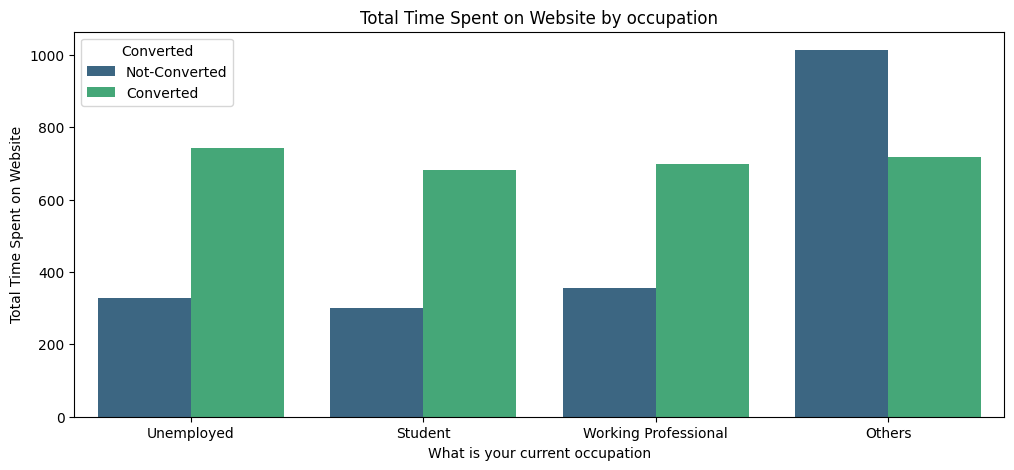

In [73]:
# the distribution of total time spent on the website across different occupations
plt.figure(figsize = [12,5])
sns.barplot(x='What is your current occupation', y='Total Time Spent on Website', hue='Converted', data=lead_score, palette='viridis', ci=None)
plt.title('Total Time Spent on Website by occupation')
plt.legend(title='Converted', labels=['Not-Converted', 'Converted'])
plt.show()

-  Almost all types of occupation field, those who have been converted, have spent almost equal amount of time on the website, which is almost more than 700 minutes; and the ones who did not get converted have spent less time comparared to the converted ones. 
-  The category 'Others' shows a significant difference in time spent between converted and non-converted leads, these are ones that have not mentioned occupation, but seem to have spend more time on the website while their conversion rate is lowest compared to all others.

### Multivariate

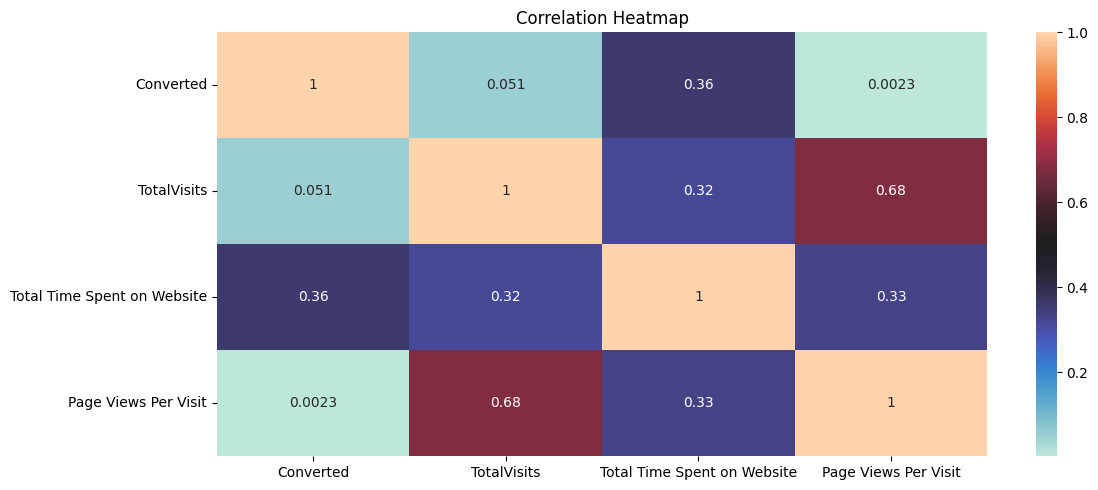

In [74]:
# correlation between few of the numerical variables w.r.t target variable
num_variables = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize=(12, 5))
sns.heatmap(lead_score[num_variables].corr(), annot=True, cmap='icefire')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

-  There is a weak positive correlation between TotalVisits and conversion rate.
-  Total Time Spent on Website has a relatively moderate positive correlation (0.31) with Converted, might suggests that customers who spend more time on the website are more likely to convert.
-  Page Views Per Visit has a very weak positive correlation (0.002) with the target variable, so it doesn't seem to have much influence on the conversion leads.

In [75]:
lead_score.shape

(9062, 14)

### Data Preparation for Modeling

-  Machine learning algorithms require numerical input thus we will be converting 'Yes' and 'No' to 1 and 0, to make the data suitable for these algorithms.

In [76]:
# list of columns to be converted
varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

# function to map Yes/No to 1/0
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# apply the function to the specified columns
lead_score[varlist] = lead_score[varlist].apply(binary_map)

In [77]:
lead_score.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Management,Student,1,Email Opened


We have 6 categorical variables for which we have to create dummy variables, and in some of the variables we must drop the category specifying 'Not Provided', 'Others' etc. to make them as reference categories.
Although both Last Notable Activity and Last Activity columns provide information about the leads's last activity, thus dropping the Last Notable Activity column to reduce redundancy and thus to simplify the dataset.
Both Lead Number and Prospect ID uniquely identify leads or prospects, but 'Lead Number' overlaps with 'Prospect ID', which uniquely identifies prospects throughout their interaction with the company, thus dropping Lead Number.

In [78]:
# Drop the 'Lead Number' column
lead_score.drop(columns=['Lead Number'], inplace=True)

In [79]:
# Drop the 'Last Notable Activity' column
lead_score.drop(columns=['Last Notable Activity'], inplace=True)

In [80]:
# create dummy variables for 'Lead Origin'
m1 = pd.get_dummies(lead_score['Lead Origin'], prefix = 'Lead_Origin')

# dropping level with big names and to avoid multicollinearity issues and now this category becomes the reference category.
ml1 = m1.drop(['Lead_Origin_Landing Page Submission'], axis = 1)

# concatenate the original dataframe lead_score with the dataframe ml1
lead_score = pd.concat([lead_score,ml1], axis = 1)

In [81]:
# create dummy variables for 'Lead Source'
m2 = pd.get_dummies(lead_score['Lead Source'], prefix = 'Lead_Source')

# dropping level Other Sources and to avoid multicollinearity issues and now this category becomes the reference category.
ml2 = m2.drop(['Lead_Source_Other Sources'], axis = 1)

# concatenate the original dataframe lead_score with the dataframe ml2
lead_score = pd.concat([lead_score,ml2], axis = 1)

In [82]:
# create dummy variables for 'Last Activity'
m3 = pd.get_dummies(lead_score['Last Activity'], prefix = 'Last_Activity')

# dropping level Other Activities and to avoid multicollinearity issues and now this category becomes the reference category.
ml3 = m3.drop(['Last_Activity_Other Activities'], axis = 1)

# concatenate the original dataframe lead_score with the dataframe ml3
lead_score = pd.concat([lead_score,ml3], axis = 1)

In [83]:
# create dummy variables for 'Specialization'
m5 = pd.get_dummies(lead_score['Specialization'], prefix = 'Specialization')

# dropping level with 'Not Provided' and to avoid multicollinearity issues and now this category becomes the reference category.
ml5 = m5.drop(['Specialization_Not Provided'], axis = 1)

# concatenate the original dataframe lead_score with the dataframe ml5
lead_score = pd.concat([lead_score,ml5], axis = 1)

In [84]:
# create new column with same data as 'What is your current occupation' and delete the old one 
lead_score['Occupation'] = lead_score['What is your current occupation']

# Drop the original column
lead_score.drop(columns=['What is your current occupation'], inplace=True)

In [85]:
# create dummy variables for 'Occupation'
m6 = pd.get_dummies(lead_score['Occupation'], prefix = 'Occupation')

# dropping level with 'Others' and to avoid multicollinearity issues and now this category becomes the reference category.
ml6 = m6.drop(['Occupation_Others'], axis = 1)

# concatenate the original dataframe lead_score with the dataframe ml5
lead_score = pd.concat([lead_score,ml6], axis = 1)

In [86]:
lead_score.drop(columns =['Lead Origin','Lead Source','Last Activity','Specialization','Occupation'], inplace=True)

In [87]:
lead_score.shape

(9062, 35)

# Model Building

### Test-Train Split

In [88]:
# remove the non-predicting features and the target variable
X = lead_score.drop(['Prospect ID','Converted'], axis =1)

X.head(3)

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Specialization_Management,Specialization_Sector-Specific,Specialization_Technology and Projects,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,0,0.0,0,0.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1,0,5.0,674,2.5,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,2.0,1532,2.0,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False


In [89]:
# storing the target vriable in y
y = lead_score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [90]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3 , random_state = 100)

In [91]:
# check shape and size
print(X_train.shape)
print(X_test.shape)

(6343, 33)
(2719, 33)


### Feature Scaling

In [92]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Apply scaler() to all the columns except the binary ones and 'dummy' variables, scaling ensures they contribute equally to the model
X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit' ]] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit' ]])

-  fit_transform() is used on training data, so the scaler learns the parameters needed for scaling and then the scaler applies the learned parameters to transform the data.

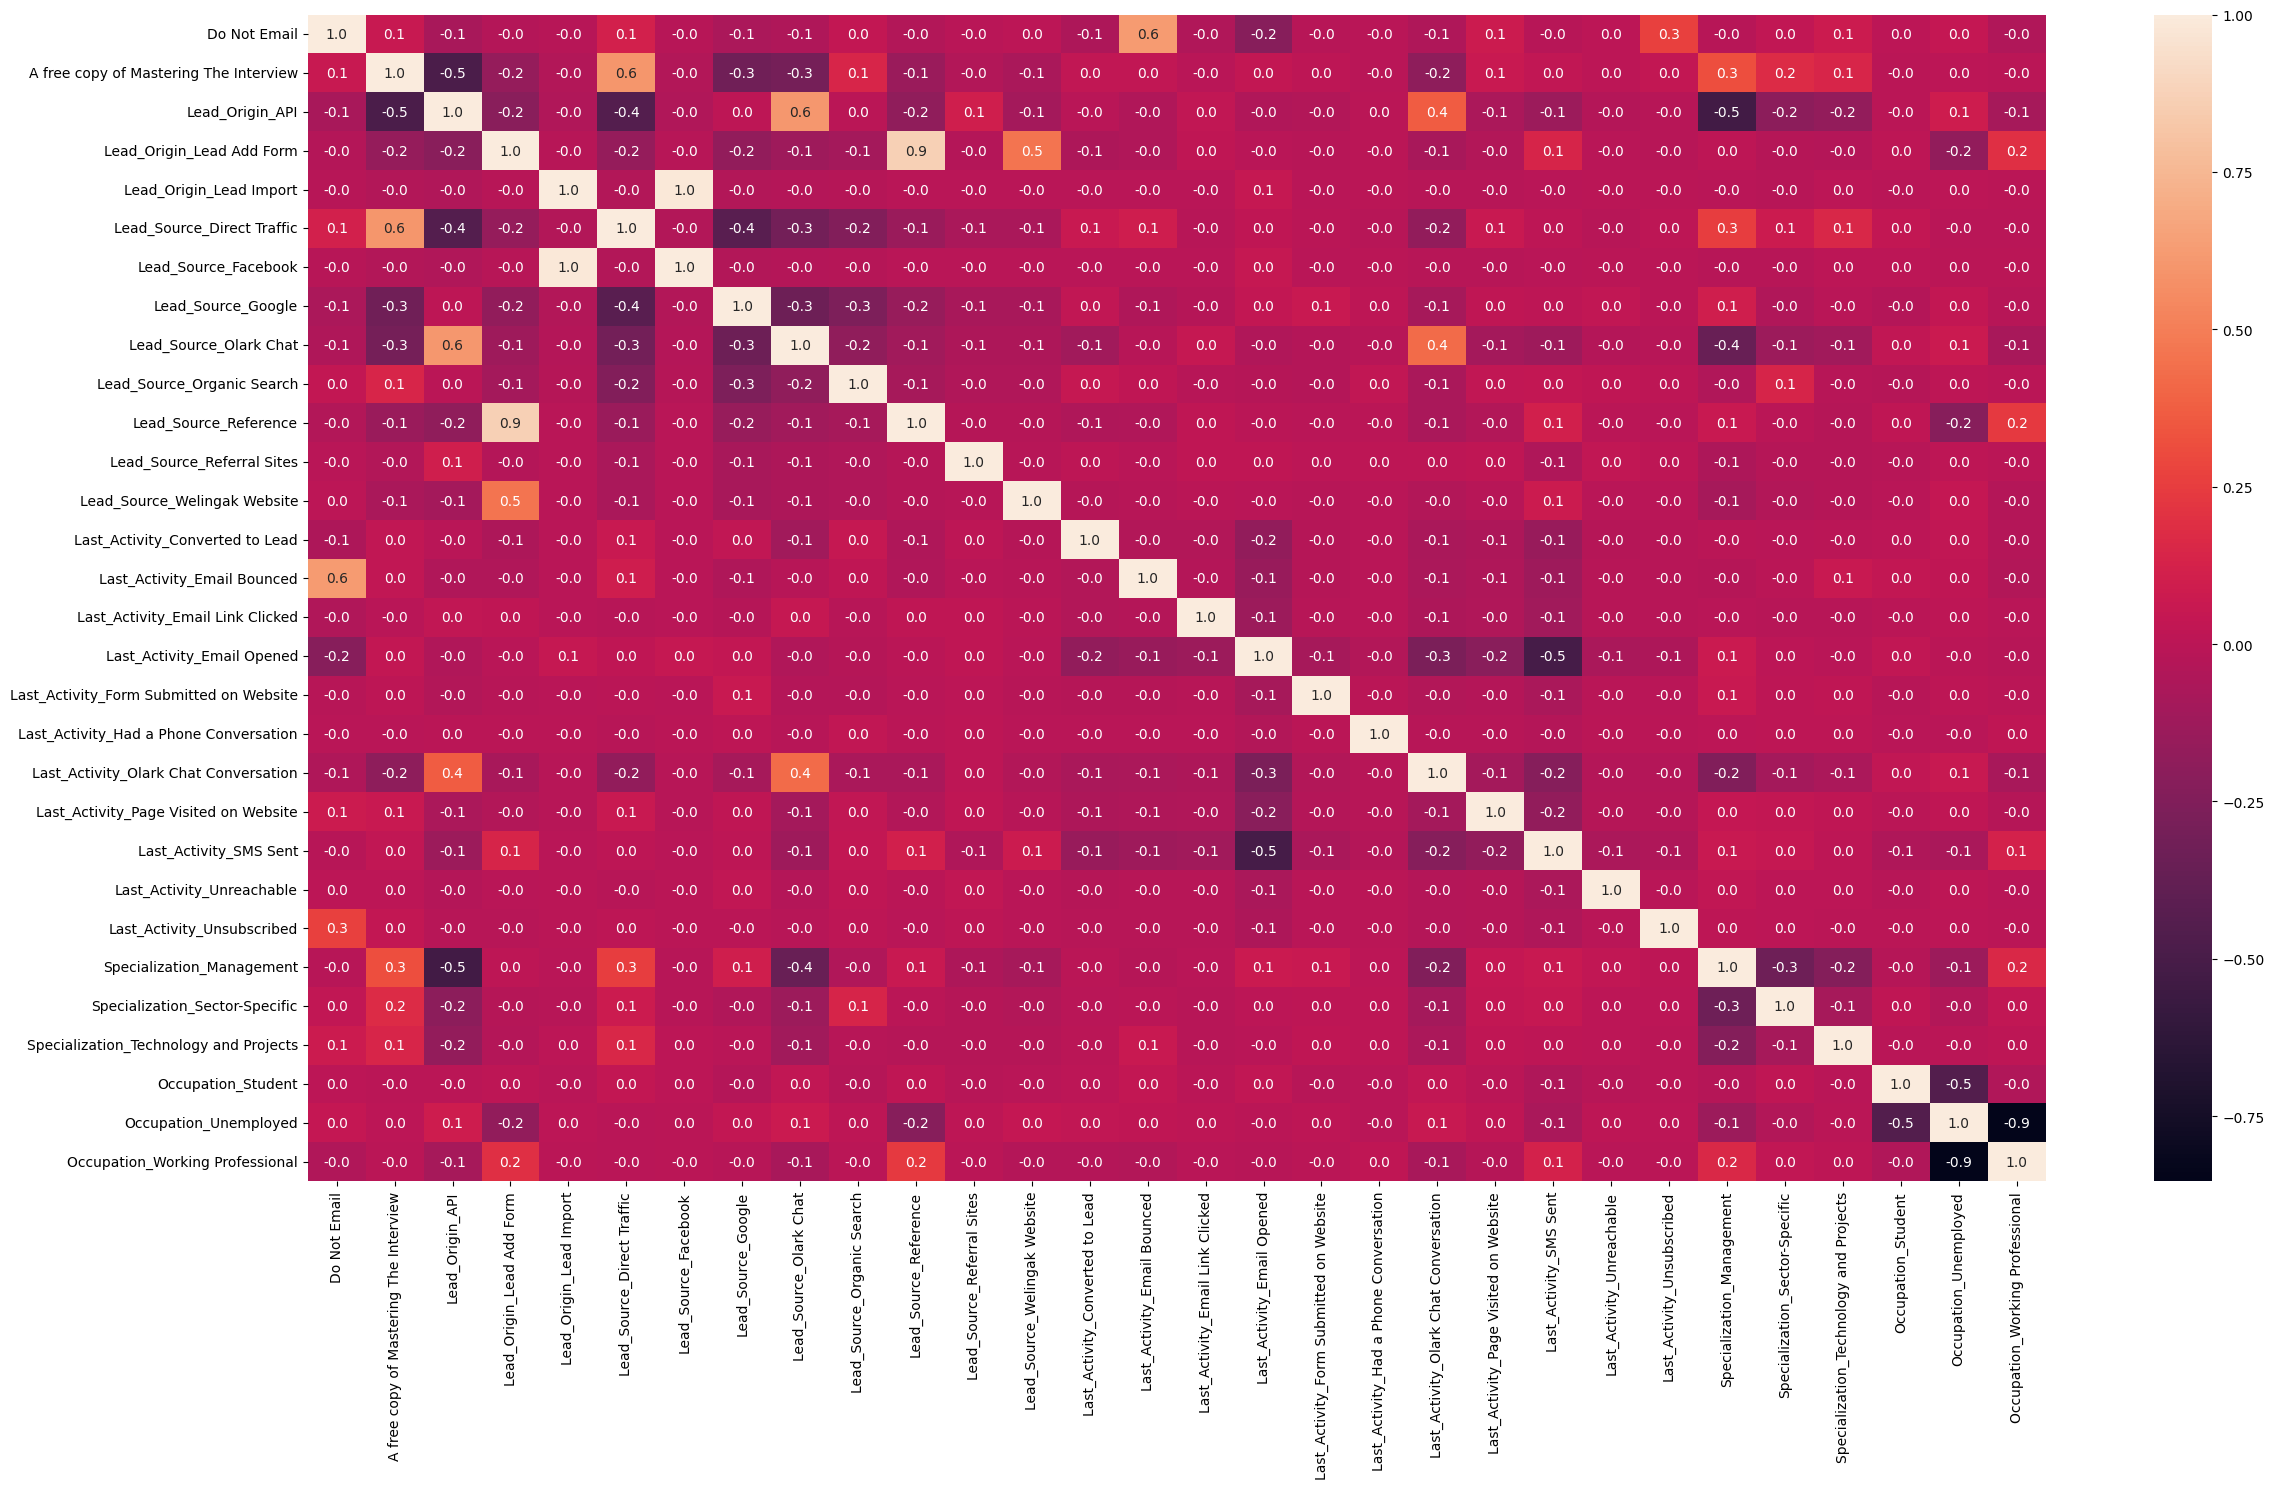

In [93]:
# List of columns to exclude
exclude_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Create a new dataframe excluding the specified columns
X_filtered = X.drop(exclude_columns, axis=1)

plt.figure(figsize=(25, 15))

# Generate heatmap for filtered dataframe
sns.heatmap(X_filtered.corr(), annot=True, fmt=".1f")

# Adjust layout
plt.tight_layout()
plt.show()

In [94]:
# Dropping highly correlated dummy variables
X_test = X_test.drop(['Lead_Source_Facebook','Lead_Source_Reference','Lead_Source_Olark Chat','Last_Activity_Email Bounced',
                      'Lead_Source_Direct Traffic','Lead_Source_Welingak Website'], axis=1)

X_train = X_train.drop(['Lead_Source_Facebook','Lead_Source_Reference','Lead_Source_Olark Chat','Last_Activity_Email Bounced',
                        'Lead_Source_Direct Traffic','Lead_Source_Welingak Website'], axis=1)

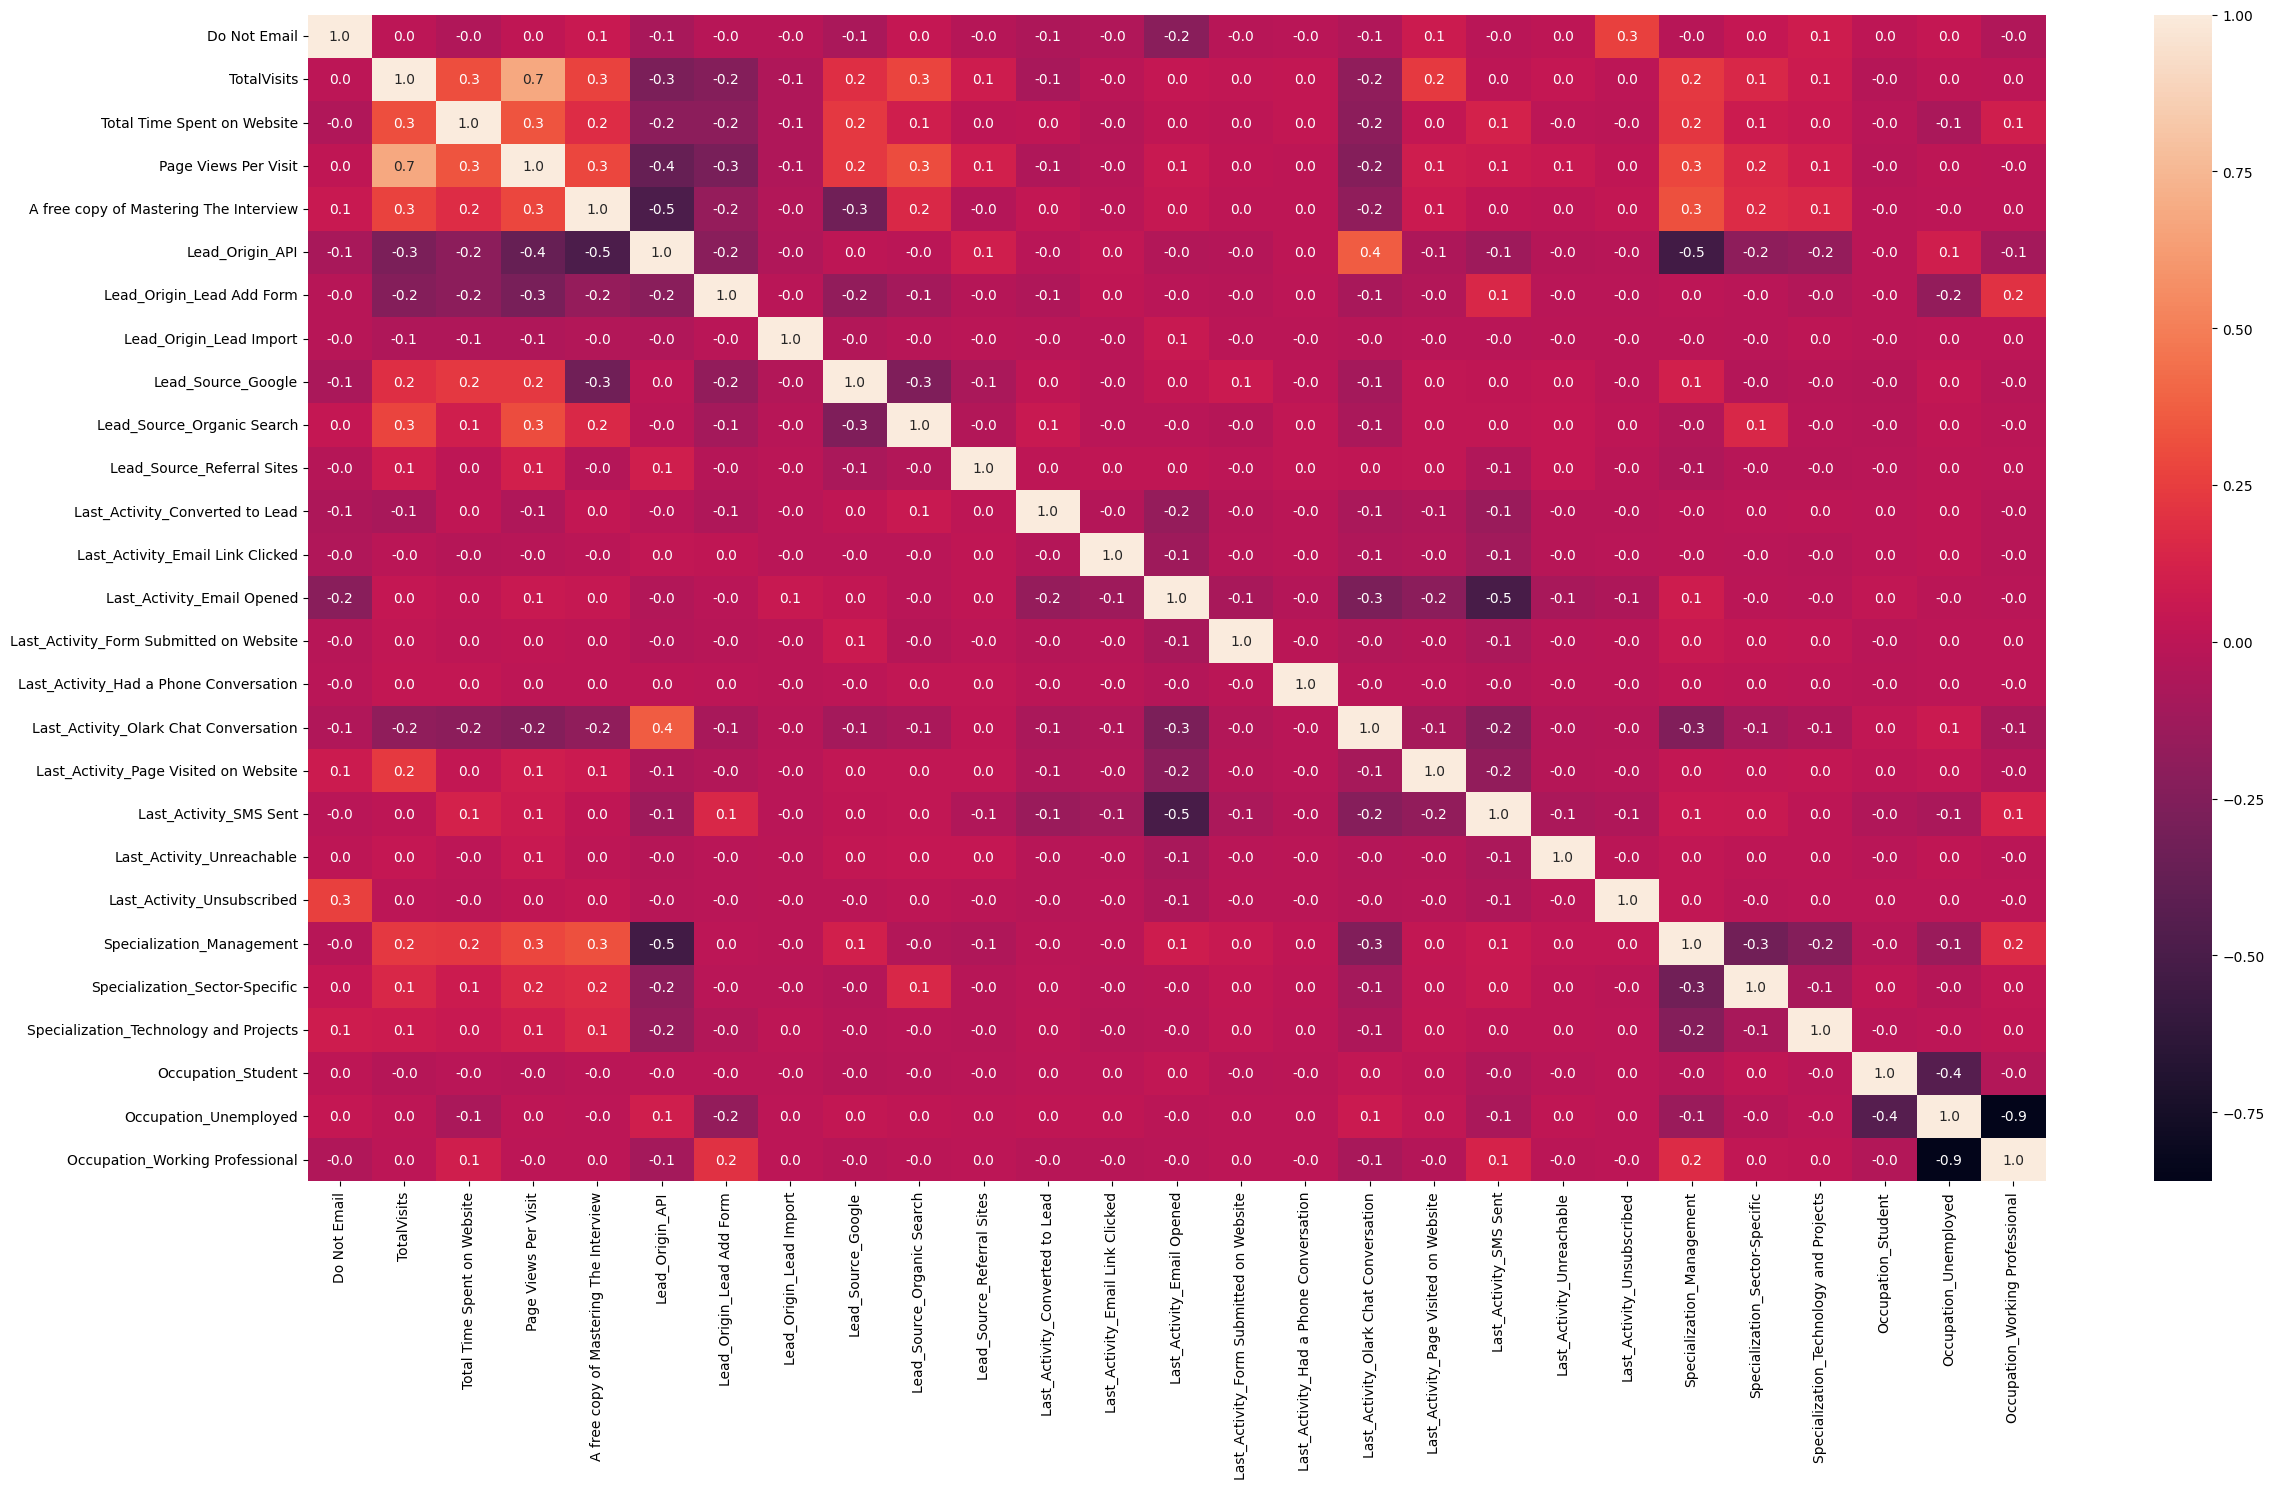

In [95]:
plt.figure(figsize=(25, 15))

# Generate heatmap 
sns.heatmap(X_train.corr(), annot=True, fmt=".1f")

# Adjust layout
plt.tight_layout()
plt.show()

In [96]:
# check shape and size
print(X_train.shape)
print(X_test.shape)

(6343, 27)
(2719, 27)


In [97]:
# check shape and size
print(y_train.shape)
print(y_test.shape)

(6343,)
(2719,)


In [98]:
# Convert boolean columns to integers

column_types = {
    'Lead_Origin_API': int, 
    'Lead_Origin_Lead Add Form': int, 
    'Lead_Origin_Lead Import': int, 
    'Lead_Source_Google': int, 
    'Lead_Source_Organic Search': int, 
    'Lead_Source_Referral Sites': int, 
    'Last_Activity_Converted to Lead': int, 
    'Last_Activity_Email Link Clicked': int, 
    'Last_Activity_Email Opened': int, 
    'Last_Activity_Form Submitted on Website': int, 
    'Last_Activity_Had a Phone Conversation': int, 
    'Last_Activity_Olark Chat Conversation': int, 
    'Last_Activity_Page Visited on Website': int, 
    'Last_Activity_SMS Sent': int, 
    'Last_Activity_Unreachable': int,
    'Last_Activity_Unsubscribed': int,
    'Specialization_Management': int,
    'Specialization_Sector-Specific': int,
    'Specialization_Technology and Projects': int,
    'Occupation_Student': int,
    'Occupation_Unemployed': int,
    'Occupation_Working Professional': int
}

# Apply the type conversion to X_train
X_train = X_train.astype(column_types)

# Apply the same type conversion to X_test
X_test = X_test.astype(column_types)

# Check data types after conversion
print(X_train.dtypes)

Do Not Email                                 int64
TotalVisits                                float64
Total Time Spent on Website                float64
Page Views Per Visit                       float64
A free copy of Mastering The Interview       int64
Lead_Origin_API                              int32
Lead_Origin_Lead Add Form                    int32
Lead_Origin_Lead Import                      int32
Lead_Source_Google                           int32
Lead_Source_Organic Search                   int32
Lead_Source_Referral Sites                   int32
Last_Activity_Converted to Lead              int32
Last_Activity_Email Link Clicked             int32
Last_Activity_Email Opened                   int32
Last_Activity_Form Submitted on Website      int32
Last_Activity_Had a Phone Conversation       int32
Last_Activity_Olark Chat Conversation        int32
Last_Activity_Page Visited on Website        int32
Last_Activity_SMS Sent                       int32
Last_Activity_Unreachable      

In [99]:
# building logistic regression model
logm1 = sm.GLM(y_train , (sm.add_constant(X_train)), family = sm.families.Binomial()) #GLM allows for more flexible, non-linear relationships
                                                                                      #Use of Binomial family, since our target variable is a binary with two outcomes
# fit the model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6343
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.7
Date:                Sun, 16 Jun 2024   Deviance:                       5285.4
Time:                        15:17:48   Pearson chi2:                 7.31e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3909
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.1442      0.826     -0.175      0.861      -1.763       1.475
Do Not Email                               -1.4478      0.206     -7.037      0.000      -1.851      -1.044
TotalVisits                                 0.1947      0.048      4.096      0.000       0.102       0.288
Total Time Spent on Website                 1.0336      0.039     26.658      0.000       0.958       1.110
Page Views Per Visit                       -0.2953      0.053     -5.521      0.000      -0.400      -0.190
A free copy of Mastering The Interview     -0.3944      0.102     -3.876      0.000      -0.594      -0.195
Lead_Origin_API                             1.1249      0.127      8.863      0.000       0.876       1.374
Lead_Origin_Lead Add Form                   4.2686      0.247     17.290      0.000       3.785       4.752
Lead_Origin_Lead Import                     1.1060      0.486      2.273      0.023       0.152       2.059
Lead_Source_Google                         -0.2470      0.095     -2.594      0.009      -0.434      -0.060
Lead_Source_Organic Search                 -0.2769      0.122     -2.267      0.023      -0.516      -0.037
Lead_Source_Referral Sites                 -0.6432      0.350     -1.839      0.066      -1.329       0.042
Last_Activity_Converted to Lead            -1.0055      0.381     -2.640      0.008      -1.752      -0.259
Last_Activity_Email Link Clicked           -0.0638      0.387     -0.165      0.869      -0.823       0.695
Last_Activity_Email Opened                  0.4706      0.327      1.440      0.150      -0.170       1.111
Last_Activity_Form Submitted on Website    -0.6288      0.458     -1.372      0.170      -1.527       0.269
Last_Activity_Had a Phone Conversation      1.8084      0.829      2.182      0.029       0.184       3.433
Last_Activity_Olark Chat Conversation      -1.0109      0.359     -2.817      0.005      -1.714      -0.308
Last_Activity_Page Visited on Website      -0.3333      0.349     -0.954      0.340      -1.018       0.352
Last_Activity_SMS Sent                      1.6581      0.322      5.148      0.000       1.027       2.289
Last_Activity_Unreachable                   0.5529      0.441      1.253      0.210      -0.312       1.418
Last_Activity_Unsubscribed                  1.3126      0.521      2.518      0.012       0.291       2.334
Specialization_Management                   1.0343      0.129      8.008      0.000       0.781       1.287
Specialization_Sector-Specific              1.1554      0.159      7.287      0.000       0.845       1.466
Specialization_Technology and Projects      1.1213      0.190      5.914      0.000       0.750       1.493
Occupation_Student                         -1.9387      0.7

-  Some variables with p-values less than 0.05 are Do Not Email, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Lead_Origin_API, Lead_Origin_Lead Add Form, Lead_Source_Google, Last_Activity_SMS Sent and many more showing they are significant, while many others have high p-value.
-  Many of them have a high negative coefficient such as A free copy of Mastering The Interview, Last_Activity_Olark Chat Conversation, Occupation_Unemployed, etc. these suggests that as the predictor variable increases, the log odds of the response variable decrease.

### Feature selection using RFE

In [100]:
# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize RFE 
rfe = RFE(estimator=logreg, n_features_to_select=15)     # selecting 15 features
rfe = rfe.fit(X_train, y_train)                          # fit the RFE model to the training data

In [101]:
rfe.support_   #check which columns are selected

array([ True, False,  True, False, False,  True,  True,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True])

In [102]:
# list column names with their selection status and ranking provided by RFE
list(zip(X_train.columns, rfe.support_ , rfe.ranking_ ))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('A free copy of Mastering The Interview', False, 7),
 ('Lead_Origin_API', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', True, 1),
 ('Lead_Source_Google', False, 10),
 ('Lead_Source_Organic Search', False, 11),
 ('Lead_Source_Referral Sites', False, 3),
 ('Last_Activity_Converted to Lead', True, 1),
 ('Last_Activity_Email Link Clicked', False, 13),
 ('Last_Activity_Email Opened', False, 4),
 ('Last_Activity_Form Submitted on Website', False, 6),
 ('Last_Activity_Had a Phone Conversation', True, 1),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Page Visited on Website', False, 9),
 ('Last_Activity_SMS Sent', True, 1),
 ('Last_Activity_Unreachable', False, 5),
 ('Last_Activity_Unsubscribed', True, 1),
 ('Specialization_Management', False, 2),
 ('Specialization_Sector-Specific', True, 1),
 ('Spec

In [103]:
# display names of columns that are selected
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead_Origin_API',
       'Lead_Origin_Lead Add Form', 'Lead_Origin_Lead Import',
       'Last_Activity_Converted to Lead',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Last_Activity_Unsubscribed', 'Specialization_Sector-Specific',
       'Specialization_Technology and Projects', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional'],
      dtype='object')

In [104]:
# display names of columns which are not selected
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead_Source_Google',
       'Lead_Source_Organic Search', 'Lead_Source_Referral Sites',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Page Visited on Website', 'Last_Activity_Unreachable',
       'Specialization_Management'],
      dtype='object')

In [105]:
# build model on selected columns

# add constant to ensure the intercept term is included in the subsequent model fitting process
X_train_sm =sm.add_constant(X_train[col])

# build model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fit model
res = logm2.fit()
res.summary()  # check model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6343
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.0
Date:                Sun, 16 Jun 2024   Deviance:                       5440.1
Time:                        15:17:49   Pearson chi2:                 6.88e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3758
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.5475      0.696      0.787      0.431      -0.816       1.911
Do Not Email                              -1.6165      0.173     -9.331      0.000      -1.956      -1.277
Total Time Spent on Website                1.0049      0.036     27.669      0.000       0.934       1.076
Lead_Origin_API                            0.6532      0.078      8.384      0.000       0.501       0.806
Lead_Origin_Lead Add Form                  4.2402      0.220     19.259      0.000       3.809       4.672
Lead_Origin_Lead Import                    1.2903      0.462      2.791      0.005       0.384       2.196
Last_Activity_Converted to Lead           -1.4084      0.207     -6.814      0.000      -1.813      -1.003
Last_Activity_Had a Phone Conversation     1.6150      0.742      2.177      0.029       0.161       3.069
Last_Activity_Olark Chat Conversation     -1.3243      0.163     -8.105      0.000      -1.645      -1.004
Last_Activity_SMS Sent                     1.2785      0.074     17.357      0.000       1.134       1.423
Last_Activity_Unsubscribed                 1.0930      0.461      2.373      0.018       0.190       1.996
Specialization_Sector-Specific             0.2152      0.110      1.959      0.050      -0.000       0.431
Specialization_Technology and Projects     0.1712      0.147      1.164      0.244      -0.117       0.460
Occupation_Student                        -1.7109      0.732     -2.339      0.019      -3.145      -0.277
Occupation_Unemployed                     -2.0111      0.697     -2.885      0.004      -3.377      -0.645
Occupation_Working Professional            0.7739      0.718      1.077      0.281      -0.634       2.182
==========================================================================================================
"""

In [106]:
# drop column Occupation_Working Professional
col = col.drop('Occupation_Working Professional')

In [107]:
# Fit the logistic regression model again with the updated set of features
X_train_sm =sm.add_constant(X_train[col])

# build model
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fit model
res = logm3.fit()
res.summary()  # check model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6343
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.5
Date:                Sun, 16 Jun 2024   Deviance:                       5441.1
Time:                        15:17:49   Pearson chi2:                 6.84e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3757
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.2802      0.177      7.215      0.000       0.932       1.628
Do Not Email                              -1.6178      0.173     -9.330      0.000      -1.958      -1.278
Total Time Spent on Website                1.0045      0.036     27.663      0.000       0.933       1.076
Lead_Origin_API                            0.6544      0.078      8.400      0.000       0.502       0.807
Lead_Origin_Lead Add Form                  4.2405      0.220     19.259      0.000       3.809       4.672
Lead_Origin_Lead Import                    1.2930      0.462      2.799      0.005       0.388       2.198
Last_Activity_Converted to Lead           -1.4018      0.206     -6.798      0.000      -1.806      -0.998
Last_Activity_Had a Phone Conversation     1.6166      0.742      2.180      0.029       0.163       3.070
Last_Activity_Olark Chat Conversation     -1.3222      0.163     -8.098      0.000      -1.642      -1.002
Last_Activity_SMS Sent                     1.2805      0.074     17.395      0.000       1.136       1.425
Last_Activity_Unsubscribed                 1.0976      0.460      2.384      0.017       0.195       2.000
Specialization_Sector-Specific             0.2160      0.110      1.966      0.049       0.001       0.431
Specialization_Technology and Projects     0.1736      0.147      1.181      0.238      -0.115       0.462
Occupation_Student                        -2.4449      0.284     -8.599      0.000      -3.002      -1.888
Occupation_Unemployed                     -2.7455      0.176    -15.600      0.000      -3.090      -2.401
==========================================================================================================
"""

In [108]:
# drop column Specialization_Technology and Projects
col = col.drop('Specialization_Technology and Projects')

In [109]:
# Fit the logistic regression model again with the updated set of features
X_train_sm =sm.add_constant(X_train[col])

# build model
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fit model
res = logm4.fit()
res.summary()  # check model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6343
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2721.2
Date:                Sun, 16 Jun 2024   Deviance:                       5442.5
Time:                        15:17:49   Pearson chi2:                 6.86e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3756
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.2981      0.177      7.342      0.000       0.952       1.645
Do Not Email                              -1.6085      0.173     -9.279      0.000      -1.948      -1.269
Total Time Spent on Website                1.0046      0.036     27.667      0.000       0.933       1.076
Lead_Origin_API                            0.6393      0.077      8.328      0.000       0.489       0.790
Lead_Origin_Lead Add Form                  4.2270      0.220     19.231      0.000       3.796       4.658
Lead_Origin_Lead Import                    1.2920      0.461      2.800      0.005       0.387       2.196
Last_Activity_Converted to Lead           -1.4026      0.206     -6.802      0.000      -1.807      -0.998
Last_Activity_Had a Phone Conversation     1.6114      0.741      2.176      0.030       0.160       3.063
Last_Activity_Olark Chat Conversation     -1.3213      0.163     -8.098      0.000      -1.641      -1.001
Last_Activity_SMS Sent                     1.2809      0.074     17.402      0.000       1.137       1.425
Last_Activity_Unsubscribed                 1.0861      0.461      2.357      0.018       0.183       1.989
Specialization_Sector-Specific             0.1997      0.109      1.833      0.067      -0.014       0.413
Occupation_Student                        -2.4487      0.284     -8.613      0.000      -3.006      -1.892
Occupation_Unemployed                     -2.7455      0.176    -15.603      0.000      -3.090      -2.401
==========================================================================================================
"""

In [110]:
# drop column Specialization_Sector-Specific
col = col.drop('Specialization_Sector-Specific')

In [111]:
# Fit the logistic regression model again with the updated set of features
X_train_sm =sm.add_constant(X_train[col])

# build model
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

# fit model
res = logm5.fit()
res.summary()  # check model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6343
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2722.9
Date:                Sun, 16 Jun 2024   Deviance:                       5445.8
Time:                        15:17:49   Pearson chi2:                 6.89e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3753
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.3295      0.176      7.553      0.000       0.984       1.674
Do Not Email                              -1.6015      0.173     -9.242      0.000      -1.941      -1.262
Total Time Spent on Website                1.0044      0.036     27.674      0.000       0.933       1.076
Lead_Origin_API                            0.6139      0.075      8.144      0.000       0.466       0.762
Lead_Origin_Lead Add Form                  4.2095      0.220     19.175      0.000       3.779       4.640
Lead_Origin_Lead Import                    1.2676      0.462      2.746      0.006       0.363       2.172
Last_Activity_Converted to Lead           -1.4061      0.206     -6.818      0.000      -1.810      -1.002
Last_Activity_Had a Phone Conversation     1.6362      0.741      2.208      0.027       0.184       3.088
Last_Activity_Olark Chat Conversation     -1.3255      0.163     -8.131      0.000      -1.645      -1.006
Last_Activity_SMS Sent                     1.2837      0.074     17.445      0.000       1.139       1.428
Last_Activity_Unsubscribed                 1.0722      0.460      2.331      0.020       0.171       1.974
Occupation_Student                        -2.4405      0.284     -8.591      0.000      -2.997      -1.884
Occupation_Unemployed                     -2.7450      0.176    -15.601      0.000      -3.090      -2.400
==========================================================================================================
"""

In [112]:
# calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range (X_train[col].shape[1])]  
                                                                                # to iterate over the range number of columns 
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,2.43
2,Lead_Origin_API,2.00
8,Last_Activity_SMS Sent,1.51
7,Last_Activity_Olark Chat Conversation,1.39
0,Do Not Email,1.19
3,Lead_Origin_Lead Add Form,1.18
1,Total Time Spent on Website,1.15
5,Last_Activity_Converted to Lead,1.08
9,Last_Activity_Unsubscribed,1.08
10,Occupation_Student,1.03


-  All variables have VIF value below 5, no significant issues of multicollinearity observed, thus we can proceed with prediction

In [113]:
# predict values and check probability
y_train_pred = res.predict(X_train_sm)  # predict based on the fitted model

In [114]:
# display first 10 elements
y_train_pred[:10]

3114    0.621883
6838    0.287688
8263    0.149801
1307    0.780160
2492    0.440866
2253    0.121905
8413    0.857883
2201    0.032666
6788    0.348304
1612    0.840972
dtype: float64

In [115]:
# reshape
y_train_pred = y_train_pred.values.reshape(-1) # convert numpy array to 1D array
y_train_pred[:10]

array([0.62188346, 0.28768791, 0.14980075, 0.78015951, 0.44086614,
       0.12190478, 0.85788268, 0.03266593, 0.34830445, 0.8409721 ])

In [116]:
# create DataFrame
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})

In [117]:
# add new column to the dataframe and show index number
y_train_pred_final['Prospect ID'] =y_train.index

In [118]:
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
0,0,0.621883,3114
1,0,0.287688,6838
2,0,0.149801,8263
3,1,0.780160,1307
4,1,0.440866,2492
5,0,0.121905,2253
6,1,0.857883,8413
7,0,0.032666,2201
8,0,0.348304,6788
9,1,0.840972,1612


In [119]:
# create a new column and put a threshold to classify
y_train_pred_final['Conversion_pred'] = y_train_pred_final['Converted_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Conversion_pred
0,0,0.621883,3114,1
1,0,0.287688,6838,0
2,0,0.149801,8263,0
3,1,0.780160,1307,1
4,1,0.440866,2492,0


In [120]:
# show confusion matrix to display misclassification
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Conversion_pred'])
print(confusion)

[[3503  424]
 [ 840 1576]]


In [121]:
# check accuracy score
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Conversion_pred']))

0.8007252088916916


-  Accuracy score will not be sufficient as we can see the confusion matrix, the ones predicted wrong are left out from the accuracy metrics, thus we need other evaluation metrics

# Model Evaluation

In [122]:
# define true positive/negative and false positive/negative
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [123]:
# calculate Sensitivity
print('Sensitivity:', TP/float(TP+FN))

Sensitivity: 0.652317880794702


In [124]:
#calculate Specificity
print('Specificity:', TN/float(TN+FP))

Specificity: 0.8920295390883626


In [125]:
# calculate positive predictie value
print('Positive predictie value:', TP/float(TP+FP))

Positive predictie value: 0.788


In [126]:
# calculate negative predictive value
print('Negative predictive value:', TN/float(TN+FN))

Negative predictive value: 0.8065853096937601


In [127]:
# calculate false positive rate
print('FPR:', FP/float(TN+FP))   # it needs to be low

FPR: 0.10797046091163738


In [128]:
# plot ROC curve
def draw_roc(actual, prob):
    fpr,tpr,thresholds = metrics.roc_curve(actual, prob, drop_intermediate = False) # returns thresholds even where TPR and FPR have same values
    auc_score = metrics.roc_auc_score(actual,prob) # area under the curve
    
    plt.figure(figsize = [5,5])
    plt.plot(fpr,tpr,label = 'ROC Curve (area = %0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate/ [1 - Specificity]')
    plt.ylabel('True Positive Rate/ Sensitivity')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = "lower right")
    plt.show()
    
    return None

In [129]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'], 
                                         drop_intermediate = False)

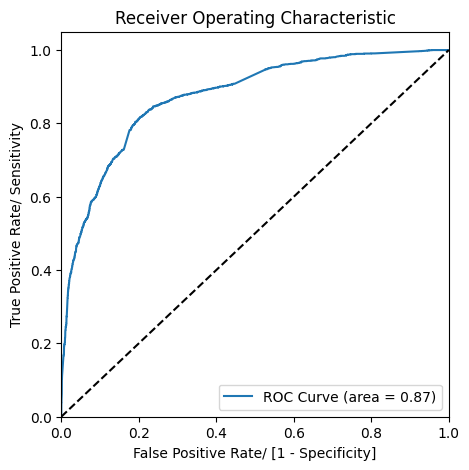

In [130]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

In [131]:
# Finding the Optimal Threshold

numbers = [float(x)/10 for x in range(10)] # to create different probability cut-offs/thresholds
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x>i else 0)
    
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Conversion_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.621883,3114,1,1,1,1,1,1,1,1,0,0,0
1,0,0.287688,6838,0,1,1,1,0,0,0,0,0,0,0
2,0,0.149801,8263,0,1,1,0,0,0,0,0,0,0,0
3,1,0.780160,1307,1,1,1,1,1,1,1,1,1,0,0
4,1,0.440866,2492,0,1,1,1,1,1,0,0,0,0,0


In [132]:
# calculate accuracy, sensitivity and specificity
cutoff_df = pd.DataFrame(columns = ['Prob_cutoffs', 'accuracy', 'sensitivity', 'specificity'])

In [133]:
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total_1 = sum(sum(cm_1))             # total sum of (sum of row1, sum of row2)
    accuracy = (cm_1[0,0] + cm_1[1,1])/ total_1
    sensitivity = cm_1[1,1]/(cm_1[1,0] + cm_1[1,1])
    specificity =cm_1[0,0] / (cm_1[0,0] + cm_1[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
print(cutoff_df)

     Prob_cutoffs  accuracy  sensitivity  specificity
0.0           0.0  0.380892     1.000000     0.000000
0.1           0.1  0.563140     0.979719     0.306850
0.2           0.2  0.735456     0.887417     0.641966
0.3           0.3  0.789847     0.848510     0.753756
0.4           0.4  0.807662     0.781043     0.824039
0.5           0.5  0.800725     0.652318     0.892030
0.6           0.6  0.793000     0.578642     0.924879
0.7           0.7  0.778023     0.499172     0.949580
0.8           0.8  0.756424     0.405629     0.972243
0.9           0.9  0.704399     0.242550     0.988541


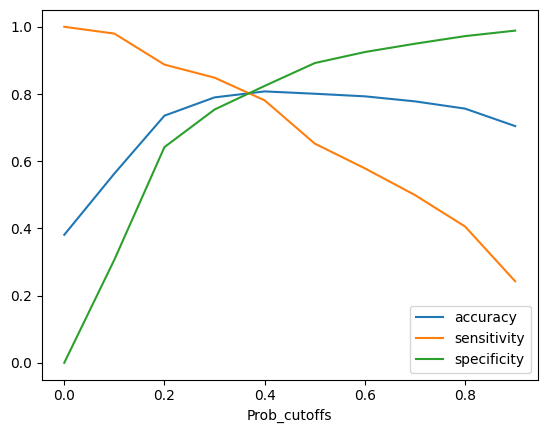

In [134]:
# plot
cutoff_df.plot.line(x = 'Prob_cutoffs', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

-  The intersection seems approximately between 0.3 and 0.4, but close to 0.4

In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Conversion_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.621883,3114,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.287688,6838,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.149801,8263,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.780160,1307,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.440866,2492,0,1,1,1,1,1,0,0,0,0,0,1


In [136]:
# check accuracy score
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

0.8068737190603815


In [137]:
# show confusion matrix to display misclassification
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print(confusion)

[[3175  752]
 [ 473 1943]]


In [138]:
# define true positive/negative and false positive/negative
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [139]:
# calculate Sensitivity
print('Sensitivity:', TP/float(TP+FN))

Sensitivity: 0.8042218543046358


In [140]:
#calculate Specificity
print('Specificity:', TN/float(TN+FP))

Specificity: 0.8085052202699261


In [141]:
# calculate positive predictie value
print('Positive predictie value:', TP/float(TP+FP))

Positive predictie value: 0.7209647495361781


In [142]:
# calculate negative predictive value
print('Negative predictive value:', TN/float(TN+FN))

Negative predictive value: 0.8703399122807017


In [143]:
# calculate false positive rate
print('FPR:', FP/float(TN+FP))   # it needs to be low

FPR: 0.19149477973007384


### Precision and Recall

In [144]:
print('Precision:', confusion[1,1]/(confusion[0,1] + confusion[1,1]))  # TP/(TP+FP)

Precision: 0.7209647495361781


In [145]:
print('Recall:', confusion[1,1]/(confusion[1,0] + confusion[1,1]))  # TP/(TP+FN)

Recall: 0.8042218543046358


-  Get Precision score and Recall score, from sklearn library to evaluate the model's performance

In [146]:
# Precision indicates the accuracy of the positive predictions
precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.7209647495361781

In [147]:
# Recall measures how many of the actual positive cases were correctly predicted
recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.8042218543046358

In [148]:
# tradeoff

y_train_pred_final['Converted'].head(10), y_train_pred_final['final_predicted'].head(10)

(0    0
 1    0
 2    0
 3    1
 4    1
 5    0
 6    1
 7    0
 8    0
 9    1
 Name: Converted, dtype: int64,
 0    1
 1    0
 2    0
 3    1
 4    1
 5    0
 6    1
 7    0
 8    0
 9    1
 Name: final_predicted, dtype: int64)

In [149]:
p,r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

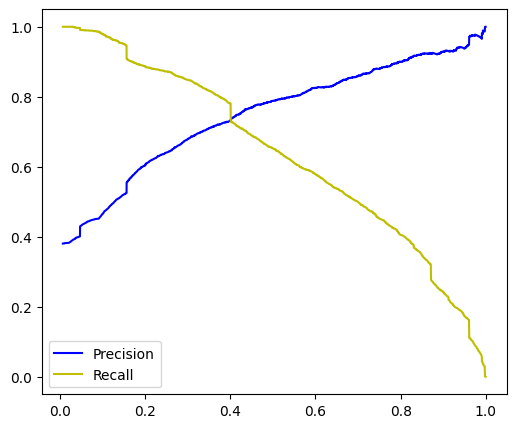

In [150]:
# plot precision and recall curve and exclude last threshold value i.e. 1
plt.figure(figsize=(6, 5))
plt.plot(thresholds, p[:-1], "b-", label='Precision')
plt.plot(thresholds, r[:-1], "y-", label='Recall')
plt.legend()
plt.show()

In [151]:
# predicition on test set
X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit' ]] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit' ]])

In [152]:
X_test = X_test[col]

In [153]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead_Origin_API,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Last_Activity_Converted to Lead,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Last_Activity_Unsubscribed,Occupation_Student,Occupation_Unemployed
2803,0,-0.433912,0,0,0,0,0,0,0,0,0,1
5125,0,-0.662648,0,0,0,0,0,0,0,0,0,1
3981,0,-0.807208,0,0,0,0,0,0,0,0,0,1
4569,0,-0.880404,0,1,0,0,0,0,1,0,0,1
5289,1,-0.827337,0,0,0,0,0,0,0,0,0,1


In [154]:
X_test_sm = sm.add_constant(X_test)

In [155]:
y_test_pred = res.predict(X_test_sm)

In [156]:
y_test_pred[:10]

2803    0.135712
5125    0.110946
3981    0.097412
4569    0.960583
5289    0.020876
8780    0.030475
3733    0.106676
6566    0.043512
6228    0.206538
4062    0.982904
dtype: float64

In [157]:
# convert to DataFrame
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df[:10]

,0
2803,0.135712
5125,0.110946
3981,0.097412
4569,0.960583
5289,0.020876
8780,0.030475
3733,0.106676
6566,0.043512
6228,0.206538
4062,0.982904


In [158]:
# convert test into DataFrame
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [159]:
# reset index to append them next to each other
y_pred_df.reset_index(drop= True, inplace =True)
y_test_df.reset_index(drop= True, inplace =True)

In [160]:
# append test and predicted
y_pred_final= pd.concat([y_test_df, y_pred_df], axis =1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,2803,0.135712
1,0,5125,0.110946
2,1,3981,0.097412
3,1,4569,0.960583
4,0,5289,0.020876


In [161]:
# rename the column title
y_pred_final = y_pred_final.rename(columns = {0 : 'Converted_prob'})

# rearrange the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis = 1)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,2803,1,0.135712
1,5125,0,0.110946
2,3981,1,0.097412
3,4569,1,0.960583
4,5289,0,0.020876


In [162]:
# create new column
y_pred_final['predicted_conversion'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,predicted_conversion
0,2803,1,0.135712,0
1,5125,0,0.110946,0
2,3981,1,0.097412,0
3,4569,1,0.960583,1
4,5289,0,0.020876,0


In [163]:
# check accuracy score
print(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['predicted_conversion']))

0.7955130562706878


In [164]:
# show confusion matrix to display misclassification
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['predicted_conversion'])
print(confusion)

[[1366  336]
 [ 220  797]]


In [165]:
# define true positive/negative and false positive/negative
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [166]:
# calculate Sensitivity
print('Sensitivity:', TP/float(TP+FN))

Sensitivity: 0.783677482792527


In [167]:
#calculate Specificity
print('Specificity:', TN/float(TN+FP))

Specificity: 0.8025851938895417


In [168]:
# calculate positive predictie value
print('Positive predictie value:', TP/float(TP+FP))

Positive predictie value: 0.703442188879082


In [169]:
# calculate negative predictive value
print('Negative predictive value:', TN/float(TN+FN))

Negative predictive value: 0.8612862547288777


In [170]:
# calculate false positive rate
print('FPR:', FP/float(TN+FP))   # it needs to be low

FPR: 0.19741480611045828


In [171]:
# add new column for lead scores
y_pred_final['Lead_score'] = round(y_pred_final['Converted_prob'] * 100, 2)

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,predicted_conversion,Lead_score
0,2803,1,0.135712,0,13.57
1,5125,0,0.110946,0,11.09
2,3981,1,0.097412,0,9.74
3,4569,1,0.960583,1,96.06
4,5289,0,0.020876,0,2.09


# Model Summary